<p>Before stating with code, we all should know the importance of data as understanding that <em>"data is power"</em>.<br>
in the next section we will give you all some insights, knowledge and lots more about customer leaving or staying by only analyizing and visualizing data.<br>
you all shall now see how some numbers can be so powerfull.<br>

<h1>Importing Packages:</h1><br>
in this section we mainly importing packages we will use in our code, in the following few lines we will demonstrate the usage of each one

1 - matplotlib & seaborn & plotly: matplotlib provides use with visualization tools<br>
2 - pandas : provides use with the tools to import our data and manipulate it<br>

In [ ]:
!pip install catboost
import matplotlib.pyplot as plt # plotting
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as st
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import *
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
import time

Obviously, here are loading the data we are going to work with

In [ ]:
df=pd.read_csv("Churn_Modelling.csv")

Churn : is a data set of informtion about customer that we feed the the machine so it can tell use if he/she is going to leave or stay<br>
the Data set consistes of 14 columns with 10 features and one target, in the following we will demo each feature<br>
1 - CreditScore : it represents the creditworthiness of the customer<br>
2 - Geography : is the countery were the customer is currently living<br>
3 - Gender : this obviously the customer gender (female or male) <span>&#128514;</span><br>
4 - Age : the customer age<br>
5 - tenure : period or duration for which the loan amount is sanctioned<br>
6 - Balance : jow much money the customer has<br>
7 - NumOfProducts : is the number of bank retail products the customer uses<br>
8 - HasCrCard : tells whether the customer has creadit card or no<br>
9 - IsActiveMember : the state of activation of the customer<br>
10 - EstimatedSalary : the annual salary of the customer<br>
<br>
<br>
<br>
<br>

Here is a glance on the data

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The statistical describtion of the data

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Summary statistics

* We have total 10K customers record with us.
* Our customer Credit Score ranges from 350 to 850 as maximum
* We have minimum customer's age as 18 years and maximum age of 92 years
* The maximum tenure of any customer with our bank is 10 years
* The customers are using atleast one of our bank product and maximum 4 products
* Alot of customers are holding a credit card and we have customers without any credit card as well.
* Our Customer's Estimated Salaries ranges from 11💵 to 199992 💵 as maximum

Basic information about the data like how much null values in each row<br>
and how many rows and columns are there in the set, also the data type of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


the isnull methos returns the number of missing values in a column  

In [ ]:
df.isnull().values.any()

False

the duplicated method returns the number of duplicated rows

In [ ]:
df.duplicated().any()

False

Here we make a copy of the data so the original data are not effected<br>
the copy method is used for this

In [ ]:
df2 = df.copy()

in the following code we replaced each binary class with a text that describs its meaning as an example the in the exited column we replaced zero with Stayed, so it is now easy to read and understand

In [ ]:
df2 = df2.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

<br>
<br>
<br>
simply in the following code we mapped each binary class to a corresponding label
using the map method
then we renamed column names so it can be more readable

In [ ]:
df2.HasCrCard = df2.HasCrCard.map({0: 'No CreditCard', 1: 'Has CreditCard'})
df2.IsActiveMember = df2.IsActiveMember.map({0: 'Inactive', 1: 'Active'})
df2.Exited = df2.Exited.map({0: 'Stayed', 1: 'Exited'})
df2.rename(columns={'Exited':'Status'},inplace = True)
df2.rename(columns={'HasCrCard':'CreditCard'},inplace = True)
df2.rename(columns={'IsActiveMember':'Activity'},inplace = True)

In [ ]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1,Has CreditCard,Active,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No CreditCard,Active,112542.58,Stayed
2,502,France,Female,42,8,159660.80,3,Has CreditCard,Inactive,113931.57,Exited
3,699,France,Female,39,1,0.00,2,No CreditCard,Inactive,93826.63,Stayed
4,850,Spain,Female,43,2,125510.82,1,Has CreditCard,Active,79084.10,Stayed


this code below is responsable for plotting how features are distributed over the number of customers

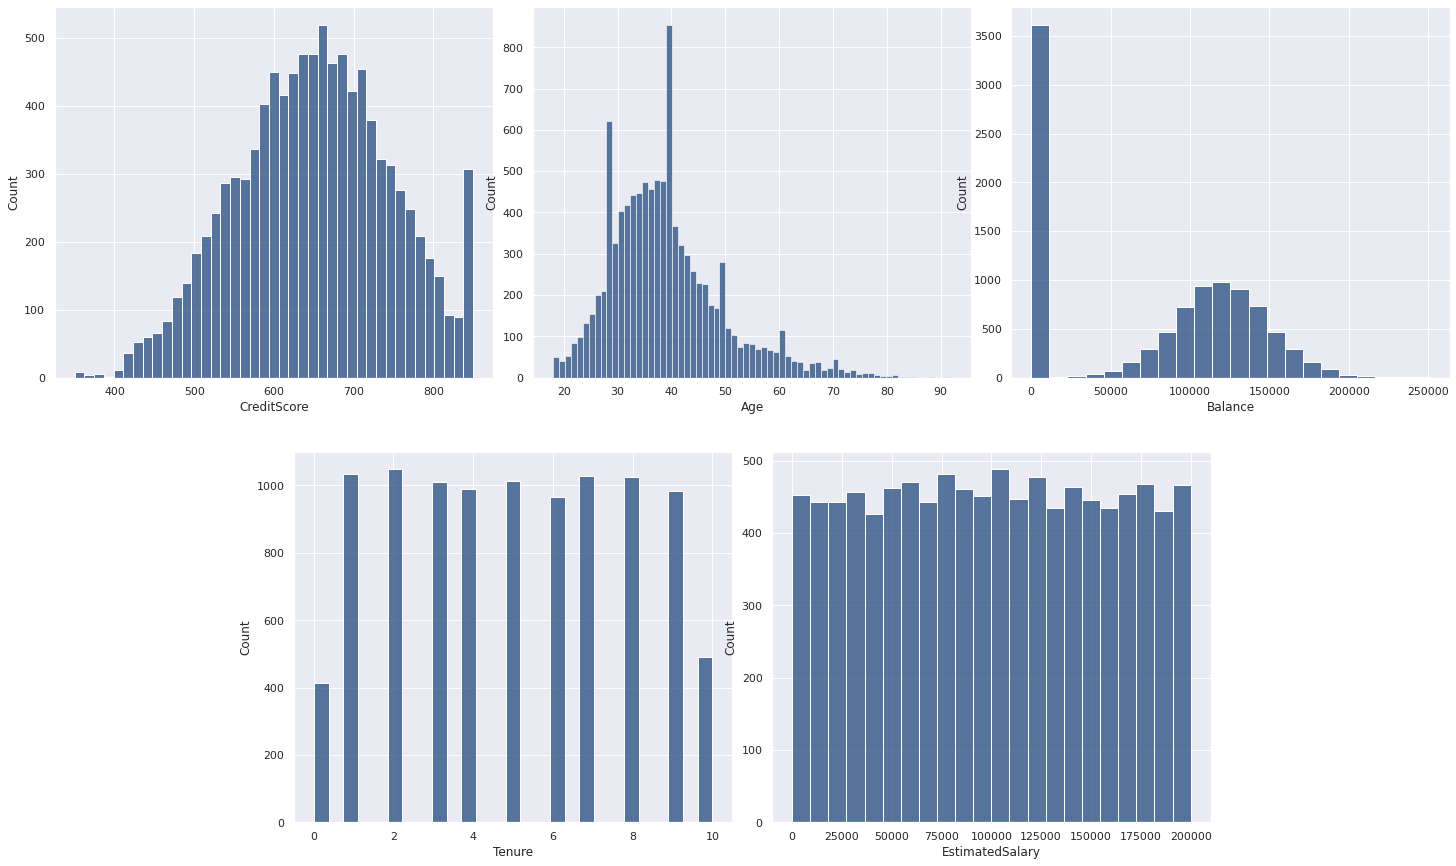

In [ ]:
# Distributions
sns.set(rc={'figure.figsize':(25,15)})
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
sns.set_theme(palette="crest_r")
sns.histplot(data = df,x = "CreditScore",ax=ax1)
sns.histplot(data = df,x = "Age",ax=ax2)
sns.histplot(data = df,x = "Balance",ax=ax3)
sns.histplot(data = df,x = "Tenure",ax=ax4)
sns.histplot(data = df,x = "EstimatedSalary",ax=ax5)

so in the first three we can see that the distribution in a billmber of cun curve (Gaussian distribution), how ever the second two are not seamingly bill curve like.

### **Highlights:**


*   Credit Score : Normally distributed with mean 650 ranges between 400 and 830
*   Age : Majority of customers ages range between 29 and 40 years old 
*   Balance : Majority of customers are normally distributed except around 3600 customer have ZERO bank balance
*   Estimated Salary of our customers are uniformly distributed means we have around the same number of customers for all different estimated salaries.



<br>
<br>
<br>
<br>

<h1><em>Let's dive more deeper in the data</em></h1>

let's plot the number customer per geographical regone. <br>
<h4>How ?</h4><br>
first you need to know how many customer are there in each class, this is done in line 2 by making the values list
in which we got the number of customer using the count methode.
then we plot it in a pie shape using plotly visualization package "<code>import plotly.graph_objects as go</code>"

In [ ]:
labels = ['Germany','France','Spain']
values = [df.Geography[df['Geography']=='Germany'].count(),df.Geography[df['Geography']=='France'].count(),df.Geography[df['Geography']=='Spain'].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0])])
fig.update_layout(title='Geography')
fig.show()

regardless of how beautiful it is, we can see that 50.1% customers are in France, 25.1% in Germany and 24.8% are in Spain<br>
<h4>How does this help ?</h4>
i will tell you how it help, looking the percentage of customers in span and germany we can see that we need to do more effort there.

**Most customers are from France**




<br>
<br>
<br>
in the following code we simply how many customer in each gender 

In [ ]:
px.pie(df, names='Gender',hole=0.5 , title = 'Gender')

looking to the pie we see that most of the customers are males but the ratio between both gender is not the great deal

here we done the same like the geography but now the categories are the products

In [ ]:
labels = ['1 Product','2 Product','3 Product','4 Product']
values = [df.NumOfProducts[df['NumOfProducts']==1].count(),df.NumOfProducts[df['NumOfProducts']==2].count(),df.NumOfProducts[df['NumOfProducts']==3].count(),df.NumOfProducts[df['NumOfProducts']==4].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(hole=0.5,labels=labels, values=values, pull=[0, 0, 0.2,0.4])])
fig.update_layout(height= 700, title='Number of Products')

fig.show()

looking to the graph it is clear that the bank need to encourage the customers to use more products
as most of the customers are using one or two products, and very much less customers are using three or four products

<br>
<br>
<br>
<br>
in the following chart we are plotting the number of customer in each class of Active feature and creditCard feature as a hist

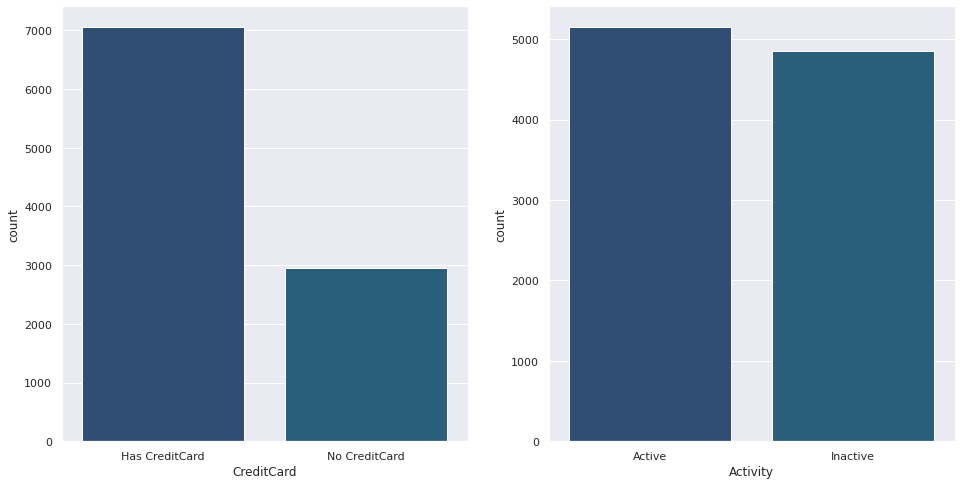

In [ ]:
sns.set(rc={'figure.figsize':(16,8)})
fig,axs = plt.subplots(1,2)
sns.set_theme(palette="crest_r")
sns.countplot(data = df2,x = "CreditCard",ax=axs[0])
sns.countplot(data = df2,x = "Activity",ax=axs[1])

looking the charts we see that most of customers has creadit card which is a good thing but there are many customers that don't use it so bank might consider doing more marketing<br>
also the number of inactive customers is large and this is a problem the managment sector should consider, however, number of active customer is larger

<br>
<br>
<br>
<br>
in the following code we plot hoe many users exit or stayed 
using the same method as with geography to get the list of user counts per class

In [ ]:
labels = ['Exited','Stayed']
values = [df2.Status[df2['Status']=='Exited'].count(),df2.Status[df2['Status']=='Stayed'].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0])])
fig.update_layout(title='Status')
fig.show()

**~80% of customers stay at the bank**


<br>
<br>
<br>
here we will plot the creadit score of customer separately based on there status, so we will see that the customer who wxited in a different colour from those who stayed

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



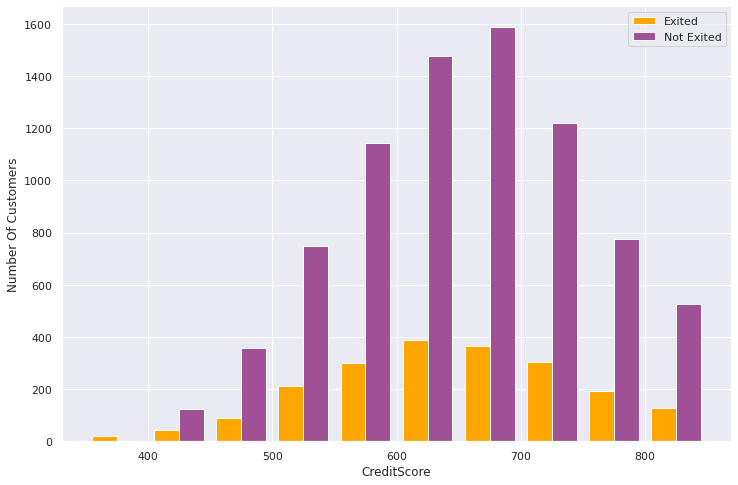

In [ ]:
#getting the ceadit score of the people who exited
CreditScore_Exited = df[df.Exited == 1].CreditScore
#getting the ceadit score of the people who stayed
CreditScore_NotExited = df[df.Exited == 0].CreditScore
plt.figure(figsize=(12,8)) 
plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.hist([CreditScore_Exited,CreditScore_NotExited],label=['Exited','Not Exited'], color=['#ffa600', '#a05195'])
plt.legend()

In [ ]:
px.histogram(df2, x='CreditScore', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Credit Score and Status')

**By looking at the credit Score it is hard to tell whether the customer tends to Exit or not because the behaviour are almost same for both. So Credit Score can't be considered as a perfect Feature.**


---
##### We have 19 customers who had less than a 400 credit score and exited the bank.






<br>
<br>
<h1>Now we go more deeper</h1>

now we go more complex and plot relation between greograph and status

In [ ]:
fig = px.sunburst(df2, path=['Geography', 'Status'],title= 'Relation between Geography and Status')
fig.update_traces(textinfo='label + percent parent')

so we see that the ratio between the exited customer and customers per countery is the smallest in France then Spain and the heighest is Germany<br>
what is wrong with German people!

**Germany has the highest percentage of exited customers and France has the highest percentage of staying customers.**




<br>
<br>
lets do the same but for Gender and status

In [ ]:
fig = px.sunburst(df2, path=['Gender', 'Status'],title= 'Relation between Gender and Status')
fig.update_traces(textinfo='label + percent parent')

from the chart we see that the ratio between female how left is heigher than males how left 

**Males tend to stay at the bank more than Females**

lets look at the relation between age and status

In [ ]:
px.histogram(df2, x='Age', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Age and Status')

**Age shows significant difference in order to identify the customer churn, The oldest customers tends to churn more as compared to young ones.**


In [ ]:
px.box(df2, x='Tenure', color='Status',title= 'Relation between Tenure and Status')

The box plot shows that customers stay at the bank for between 3 and 7 years.
The customers who exited the bank stayed for 2 to 8 years.

**The behaviour are almost same for both. So Tenure can't be considered as a perfect Feature.**


In [ ]:
px.histogram(df2, x='Balance', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Balance and Status')

The graph is normally distributed.

**The behaviour are almost same for both. So Balance can't be considered as a perfect Feature.**


now we see relation between number of products and status

In [ ]:
fig = px.sunburst(df2, path=['NumOfProducts', 'Status'],title= 'Relation between Number of Products and Status')
fig.update_layout(height= 700)
fig.update_traces(textinfo='label + percent parent')

**We see that half the customers subscribe to only 1 product, and the rest mostly subscribe to 2 products (a small fraction subscribe to 3 and 4 products). But while 28% of the customers subscribing to only 1 product exit, only 8% of those subscribing to 2 products do so. So, we see that the number of products is a perfect feature to use.**

now we see relation between hasCreditCard and status

In [ ]:
fig = px.sunburst(df2, path=['CreditCard', 'Status'],title= 'Relation between Credit Card and Status')
fig.update_traces(textinfo='label + percent parent')

****We have almost the same ratio of customer churn in both cases.****

now we see relation between number of Activity and status

In [ ]:
fig = px.sunburst(df2, path=['Activity', 'Status'],title= 'Relation between Activity and Status')
fig.update_traces(textinfo='label + percent parent')

**Inactive customers tend to exit the bank almost 2 times the active customers.**

In [ ]:
px.histogram(df2, x='EstimatedSalary', color='Status',color_discrete_sequence = ['#ffa600', '#a05195'],title= 'Relation between Estimated Salary and Status')

**Estimated Salary shows same behavoiur for both status**



let's see the spermann correlation to see with features are related the most to the target

In [ ]:
# Correlations among columns
corr=df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004187,0.005130,0.000476,-0.006934,-0.009013,0.008305,0.000599,0.012044,-0.006007,-0.016571
CustomerId,0.004187,1.000000,0.005967,0.008775,-0.015072,-0.013932,0.019297,-0.014023,0.001682,0.015246,-0.006264
CreditScore,0.005130,0.005967,1.000000,-0.007974,0.001133,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289
Age,0.000476,0.008775,-0.007974,1.000000,-0.010405,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968
Tenure,-0.006934,-0.015072,0.001133,-0.010405,1.000000,-0.009513,0.012908,0.022354,-0.028673,0.007778,-0.013978
Balance,-0.009013,-0.013932,0.005687,0.033304,-0.009513,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110
NumOfProducts,0.008305,0.019297,0.012568,-0.058566,0.012908,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282
HasCrCard,0.000599,-0.014023,-0.003802,-0.015278,0.022354,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138
IsActiveMember,0.012044,0.001682,0.024262,0.039839,-0.028673,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128
EstimatedSalary,-0.006007,0.015246,0.001237,-0.002431,0.007778,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081


Text(0.5, 1.0, 'correlation')

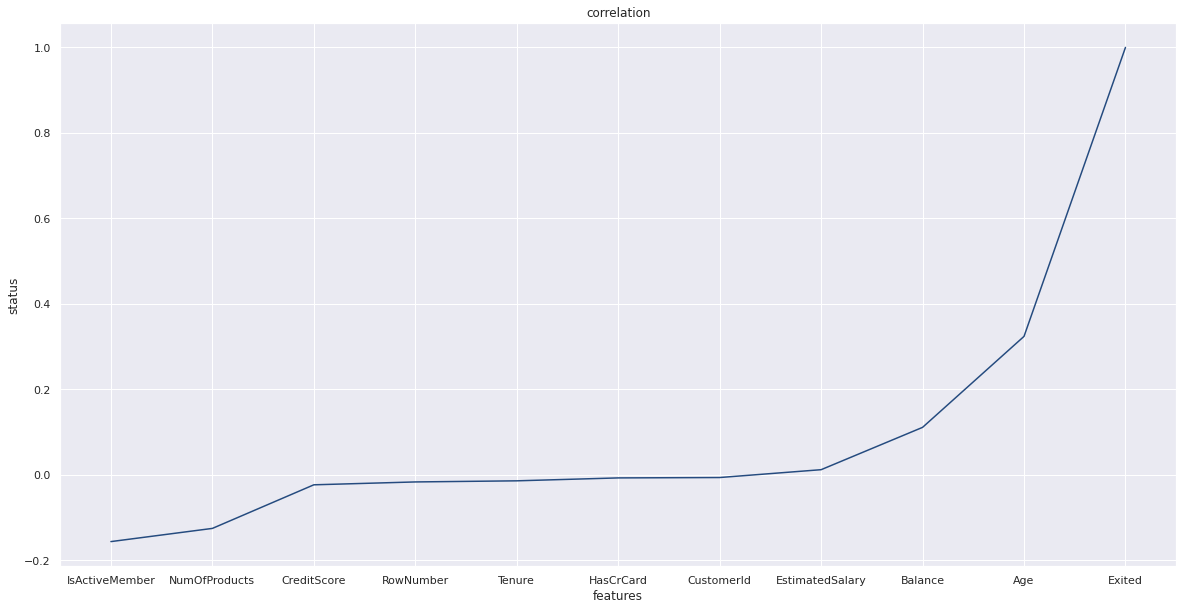

In [ ]:
Exited_relation = corr["Exited"].sort_values(ascending=True)
plt.figure(figsize=(20, 10))
plt.plot(Exited_relation)
plt.xlabel("features")
plt.ylabel("status")
plt.title("correlation")


now it is easy to say that Salary, Balance and Age are closely related to status

**As shown in the correlation plot that Age was related to Exited Status.**

## Insights from EDA:
Based on our EDA the features that drive this process or an important one to identify customers churns are :
* Geography
* Gender
* Age
* NumOfProducts
* Activity






In [ ]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1,Has CreditCard,Active,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No CreditCard,Active,112542.58,Stayed
2,502,France,Female,42,8,159660.80,3,Has CreditCard,Inactive,113931.57,Exited
3,699,France,Female,39,1,0.00,2,No CreditCard,Inactive,93826.63,Stayed
4,850,Spain,Female,43,2,125510.82,1,Has CreditCard,Active,79084.10,Stayed


# Check Outliers

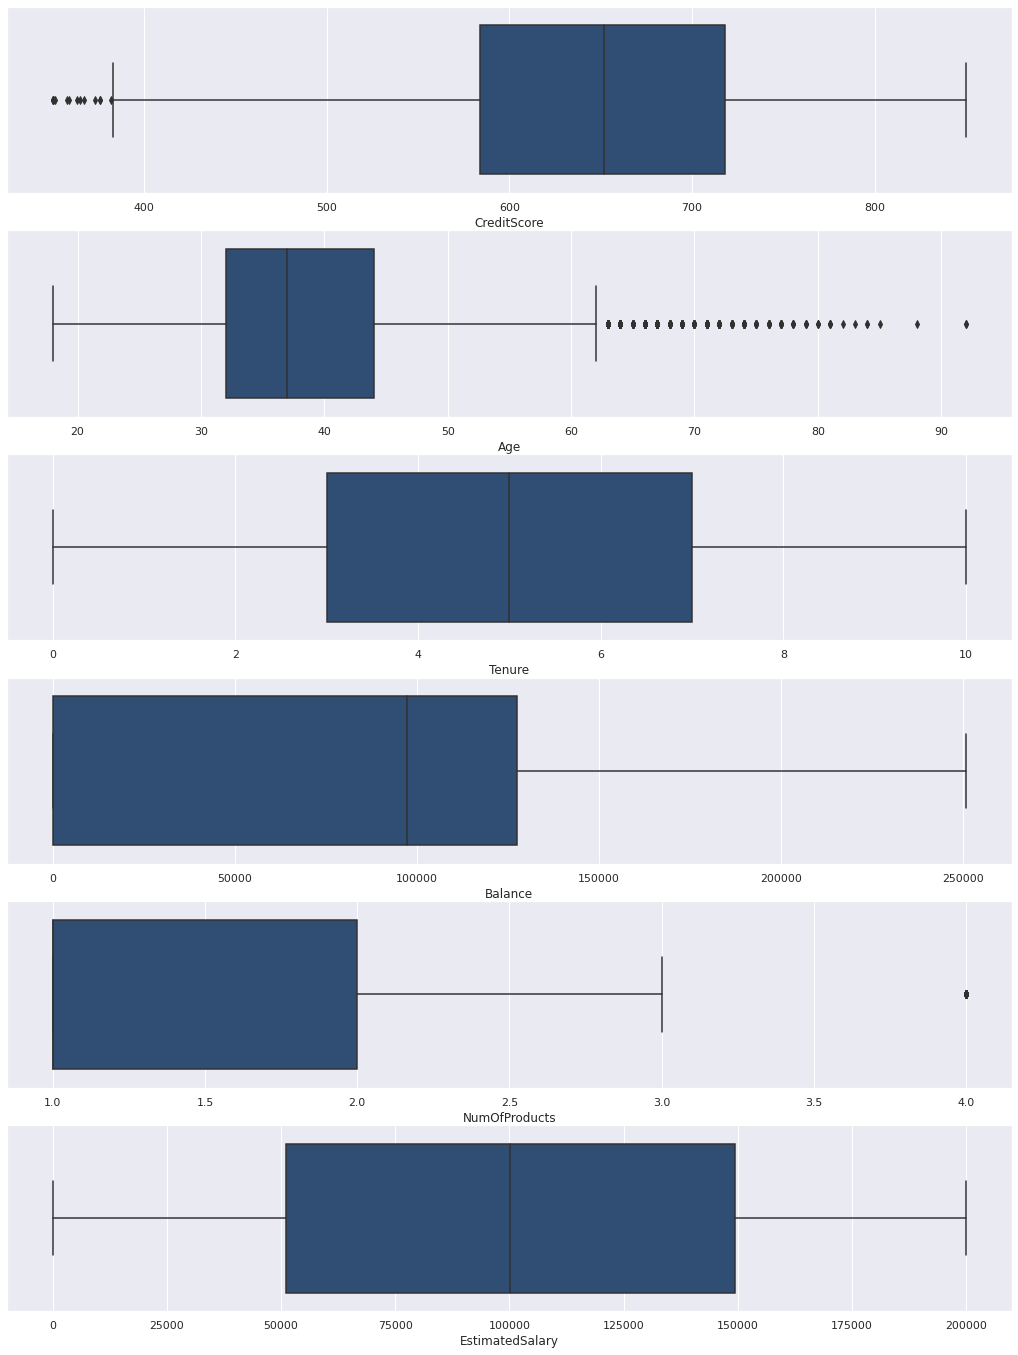

In [ ]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
fig, ax = plt.subplots(6, 1, figsize=(18,24))
for i in range(6):
    sns.boxplot(x = df2[num_cols[i]], ax=ax[i])

**There are outliers in all of numberical columns, so I need to handle them, I choose to cap the outliers by move them to upper and lower bound**

**I used Interquartile Range Method to remove the outliers.**

We can use the IQR method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers. To build this fence we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [ ]:
for col in num_cols:
  # calculate interquartile range
  Q1 = df2[col].quantile(0.25)
  Q3 = df2[col].quantile(0.75)
  IQR = Q3 - Q1
  #calculate the outlier cutoff
  S = 1.5*IQR
  LB = Q1 - S
  UB = Q3 + S
  # identify outliers
  df2.loc[df2[col] > UB,col] = UB
  # remove outliers
  df2.loc[df2[col] < LB,col] = LB

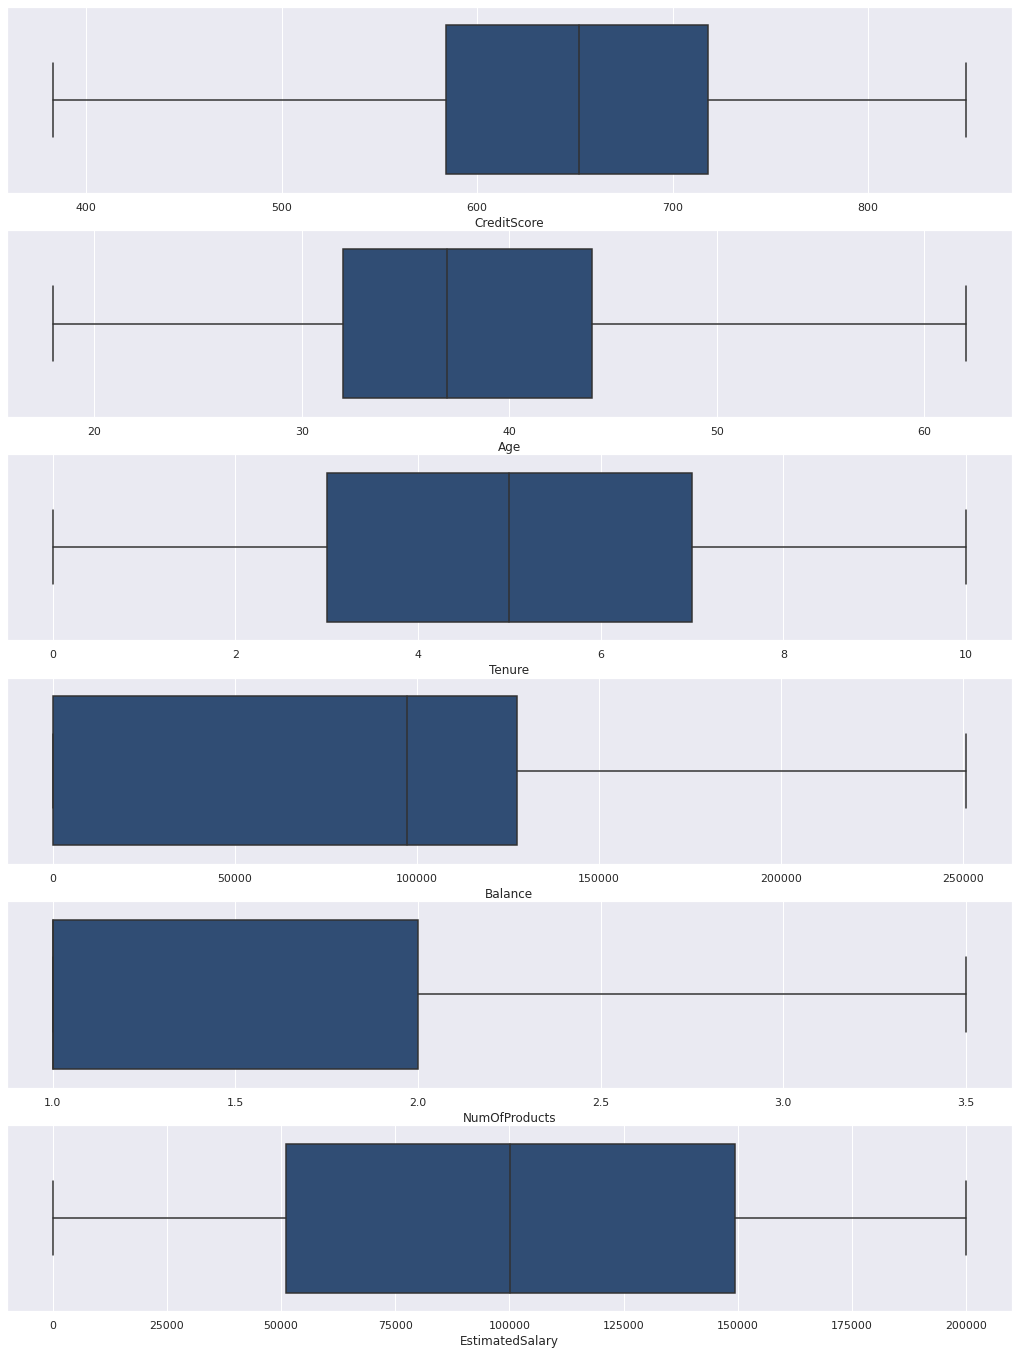

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(18,24))
for i in range(6):
    sns.boxplot(x = df2[num_cols[i]], ax=ax[i])

#Phase 2 [Preprocessing]

#Feature Encoding

In [ ]:
df2.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts      float64
CreditCard          object
Activity            object
EstimatedSalary    float64
Status              object
dtype: object

In [ ]:
df2['CreditCard']=df['HasCrCard']
df2['Activity']=df['IsActiveMember']
df2['Status']=df['Exited']

In [ ]:
data=df2.copy()

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3.0,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1.0,1,1,79084.10,0


In [ ]:
#Feature Encoding
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])
# Gender 0-Female,1-Male
# Geography 0-France,1-Germany,2-Spain

In [ ]:
data = pd.get_dummies(data=data, columns=['Gender','Geography'])

In [ ]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,619,42,2,0.00,1.0,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1.0,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3.0,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2.0,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1.0,1,1,79084.10,0,1,0,0,0,1


['CreditScore' 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'Activity'
 'EstimatedSalary' 'Status' 'Gender_0' 'Gender_1' 'Geography_0'
 'Geography_1']


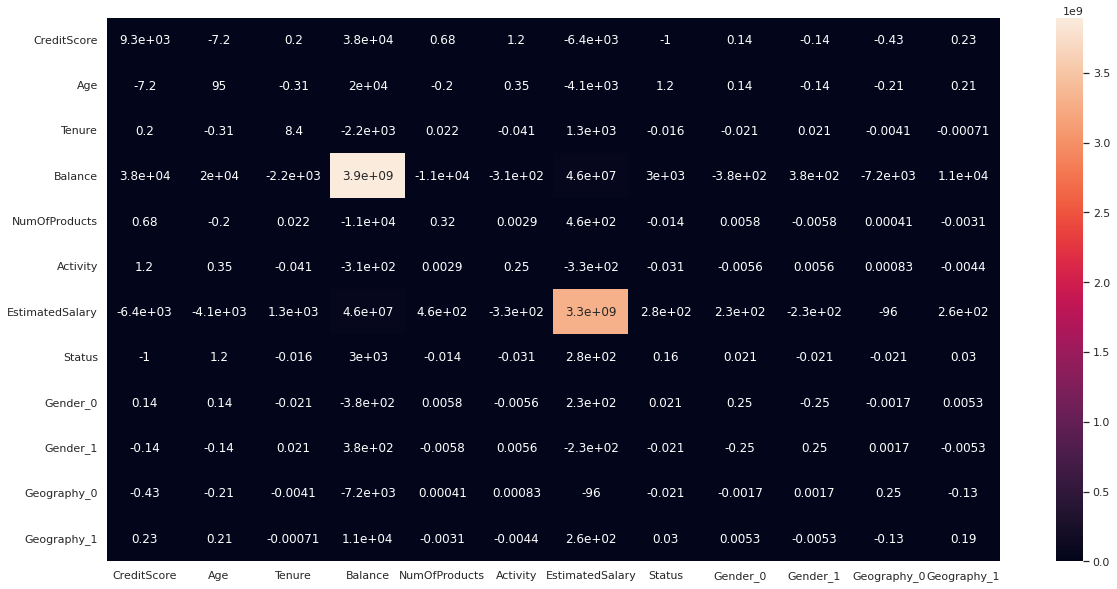

In [ ]:
#Get the covariance between the data
corr = data.cov()

# Top covariance training features with the diagnosis
top_feature = corr.index[abs(corr['Status']) >= 0.01]

# Top Features Affecting the Value of Diagnostics
print(top_feature.values)


#Dealing with high-quality features only
Important_Data =data[top_feature.values]

# plotting The covariance as a heat map
plt.subplots(figsize=(20, 10))
top_corr = data[top_feature].cov()
sns.heatmap(top_corr, annot=True)
plt.show()

In [ ]:
#Feature Selection
data.corr()['Status'].sort_values(ascending=False)

Status             1.000000
Age                0.312436
Geography_1        0.173488
Balance            0.118533
Gender_0           0.106512
EstimatedSalary    0.012097
CreditCard        -0.007138
Tenure            -0.014001
CreditScore       -0.026455
Geography_2       -0.052667
NumOfProducts     -0.059196
Geography_0       -0.104955
Gender_1          -0.106512
Activity          -0.156128
Name: Status, dtype: float64

In [ ]:
X = data.drop(['Status'],axis=1)
Y = data.Status

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
0,619,42,2,0.00,1.0,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1.0,0,1,112542.58,1,0,0,0,1
2,502,42,8,159660.80,3.0,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2.0,0,0,93826.63,1,0,1,0,0
4,850,43,2,125510.82,1.0,1,1,79084.10,1,0,0,0,1


In [ ]:
model=RandomForestClassifier()
selector=RFE(estimator=model,n_features_to_select=9)
selector.fit(X,Y)


RFE(estimator=RandomForestClassifier(), n_features_to_select=9)

In [ ]:
selected_feat = data.columns[selector.get_support(indices=True)]
print(selected_feat)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Activity',
       'EstimatedSalary', 'Status', 'Geography_0'],
      dtype='object')


In [ ]:
data[selected_feat].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,Activity,EstimatedSalary,Status,Geography_0
0,619,42,2,0.00,1.0,1,101348.88,1,1
1,608,41,1,83807.86,1.0,1,112542.58,0,0
2,502,42,8,159660.80,3.0,0,113931.57,1,1
3,699,39,1,0.00,2.0,0,93826.63,0,1
4,850,43,2,125510.82,1.0,1,79084.10,0,0


#Dealing with unbalanced data

In [ ]:
X = data.drop(['Status'],axis=1)
Y = data.Status

In [ ]:
class1 = Y[Y==1].count()
class2 = Y[Y==0].count()
print(class1)
print(class2)

2037
7963


In [ ]:
#best model before Data balance
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)
model=XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=8, random_state=42)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Testing accuracy: '+(str(accuracy)))
print(classification_report(Y_train,  model.predict(X_train)))
print(classification_report(Y_test,  model.predict(X_test)))

Testing accuracy: 0.856
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6356
           1       1.00      0.97      0.98      1644

    accuracy                           0.99      8000
   macro avg       1.00      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.51      0.58       393

    accuracy                           0.86      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)
model=GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_train,  model.predict(x_train)))
print(classification_report(y_test,  model.predict(x_test)))

0.866
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6356
           1       0.96      0.75      0.84      1644

    accuracy                           0.94      8000
   macro avg       0.95      0.87      0.90      8000
weighted avg       0.94      0.94      0.94      8000

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.51      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



# Split The dataset into Train and Test

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)

In [ ]:
oversample = SMOTE()
undersample = RandomUnderSampler()

steps = [("o",oversample), ("u",undersample)]
pipline = Pipeline(steps = steps)
x_train,y_train = pipline.fit_resample(x_train,y_train)

In [ ]:
class1 = y_train[y_train==1].count()
class2 = y_train[y_train==0].count()
print(class1)
print(class2)

7963
7963


In [ ]:
y_train.count()

15926

In [ ]:
labels = ['Exited','Stayed']
values = [class1,class2]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0])])
fig.update_layout(title='Status')
fig.show()

In [ ]:
x_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Gender_0,Gender_1,Geography_0,Geography_1,Geography_2
13555,558,54,4,99674.584666,1.0,0,0,44391.821695,1,0,0,1,0
1665,768,42,5,0.000000,3.0,0,0,60686.400000,0,1,1,0,0
14878,720,45,1,102882.400000,2.0,1,1,35633.150000,1,0,1,0,0
7471,638,36,6,0.000000,1.0,1,0,164247.510000,1,0,1,0,0
2582,652,37,7,0.000000,2.0,1,0,68789.930000,0,1,0,0,1


#The data is ready to train & test the model

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(12740, 13)
(12740,)
(3186, 13)
(3186,)


# **DecisionTree**

Training time : 0.08165740966796875 Seconds
Testing accuracy   : 87.94726930320151 %
MSE [TEST]          : 0.12052730696798493
Training accuracy  : 90.7927786499215 %
MSE [TRAIN]         : 0.09207221350078493
precision :  0.9229681978798586
recall    :  0.8260594560404807
f1_score  :  0.8718291054739652


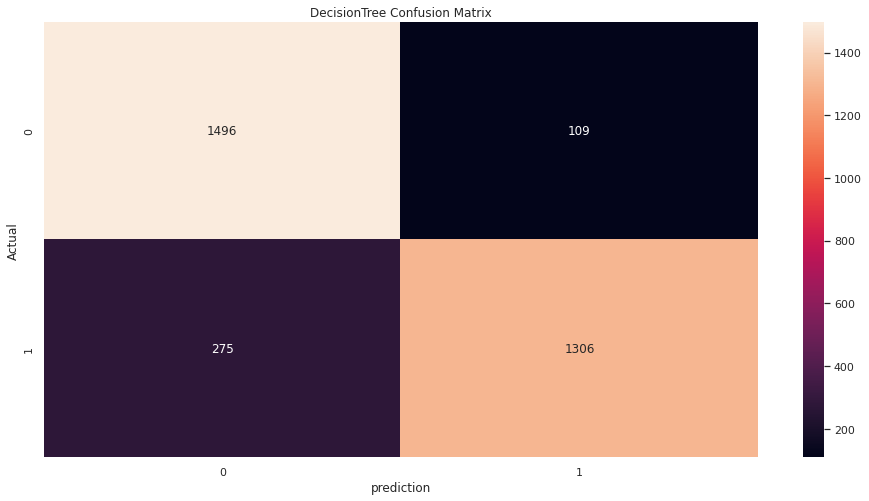

In [ ]:
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
#Model
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)

#Training
time_1 = time.time()
tree.fit(x_train, y_train)
time_2 = time.time()



#Time
time_interval = time_2 - time_1
print("Training time :" , time_interval , "Seconds")

#Accuracy
tree_predict = tree.predict(x_test)
print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


tree_predict1 = tree.predict(x_train)
print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

print("precision : ",precision_score(y_test, tree_predict))
print("recall    : ",recall_score(y_test, tree_predict))
print("f1_score  : ",f1_score(y_test, tree_predict))

cf1 = confusion_matrix(y_test,tree_predict)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.show()

# **XGBoost Gridsearch**

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_model = XGBClassifier(random_state=42)
xgb_model = GridSearchCV(estimator=xgb_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


xgb_predict = xgb_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,xgb_predict))
print("F1 score: ",f1_score(y_test, xgb_predict))
print("roc_auc score",roc_auc_score(y_test, xgb_predict))
print(xgb_model.best_params_)
print(xgb_model.best_estimator_)
print(classification_report(y_train,  xgb_model.predict(x_train)))
print(classification_report(y_test,  xgb_model.predict(x_test)))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
testing accuracy 0.8907721280602636
F1 score:  0.8895939086294417
roc_auc score 0.8907422842516566
{'gamma': 0.001, 'learning_rate': 0.3, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=8, random_state=42)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6358
           1       1.00      0.99      0.99      6382

    accuracy                           0.99     12740
   macro avg       0.99      0.99      0.99     12740
weighted avg       0.99      0.99      0.99     12740

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1605
           1       0.89      0.89      0.89      1581

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



# **RandomForest Gridsearch**


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
param_grid = {'max_depth': [3, 5, 7,9], 'max_features': [3,5,7,9,11, 12],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RF_model = RandomForestClassifier(random_state=42)

RF_model = GridSearchCV(estimator=RF_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


RF_predict = RF_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,RF_predict))
print("F1 score: ",f1_score(y_test, RF_predict))
print("roc_auc score",roc_auc_score(y_test, RF_predict))
print(RF_model.best_params_)
print(RF_model.best_estimator_)
print(classification_report(y_train,  RF_model.predict(x_train)))
print(classification_report(y_test,  RF_model.predict(x_test)))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
testing accuracy 0.8725674827369743
F1 score:  0.8711111111111111
roc_auc score 0.8725318767844792
{'max_depth': 9, 'max_features': 7, 'min_samples_split': 6, 'n_estimators': 50}
RandomForestClassifier(max_depth=9, max_features=7, min_samples_split=6,
                       n_estimators=50, random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6358
           1       0.91      0.89      0.90      6382

    accuracy                           0.90     12740
   macro avg       0.90      0.90      0.90     12740
weighted avg       0.90      0.90      0.90     12740

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1605
           1       0.87      0.87      0.87      1581

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      

# **LightGradientBossting Machine Gridsearch**

In [ ]:
param_grid = {
    'max_depth': [3,5,7],
    'num_leaves': [5, 10],
    'learning_rate': [0.005, 0.05],
    'n_estimators': [200,500,1000],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model = GridSearchCV(estimator=lgbm_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


lgb_predict = lgbm_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,lgb_predict))
print("F1 score: ",f1_score(y_test, lgb_predict))
print("roc_auc score",roc_auc_score(y_test, lgb_predict))
print(lgbm_model.best_params_)
print(lgbm_model.best_estimator_)
print(classification_report(y_train,  lgbm_model.predict(x_train)))
print(classification_report(y_test,  lgbm_model.predict(x_test)))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
testing accuracy 0.8882611424984307
F1 score:  0.8859705317104419
roc_auc score 0.8881602203739499
{'feature_fraction': 0.5, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 5, 'n_estimators': 1000, 'num_leaves': 10, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
LGBMClassifier(feature_fraction=0.5, learning_rate=0.05, max_depth=7,
               min_child_samples=5, n_estimators=1000, num_leaves=10,
               random_state=42, reg_alpha=0.1, reg_lambda=0.1)
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6358
           1       0.94      0.90      0.92      6382

    accuracy                           0.92     12740
   macro avg       0.92      0.92      0.92     12740
weighted avg       0.92      0.92      0.92     12740

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1605
           1       0.90      0.8

# **CatBoost Gridsearch**

In [ ]:
param_grid = {
    'depth': [3,7,10],
    'learning_rate': [0.001, 0.01],
    'iterations': [200,500,1000],
    'l2_leaf_reg': [3,5,7],
}
cb_model = CatBoostClassifier(random_state=42)
cb_model = GridSearchCV(estimator=cb_model, 
                             param_grid=param_grid, 
                             scoring = "recall", 
                             n_jobs = -1, verbose = 2).fit(x_train, y_train)


cat_predict = cb_model.predict(x_test)
print("testing accuracy",accuracy_score(y_test,cat_predict))
print("F1 score: ",f1_score(y_test, cat_predict))
print("roc_auc score",roc_auc_score(y_test, cat_predict))
print(cb_model.best_params_)
print(cb_model.best_estimator_)
print(classification_report(y_train,  cb_model.predict(x_train)))
print(classification_report(y_test,  cb_model.predict(x_test)))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0:	learn: 0.6819600	total: 78.7ms	remaining: 1m 18s
1:	learn: 0.6708638	total: 110ms	remaining: 55s
2:	learn: 0.6602344	total: 160ms	remaining: 53.3s
3:	learn: 0.6497447	total: 188ms	remaining: 46.9s
4:	learn: 0.6398944	total: 217ms	remaining: 43.2s
5:	learn: 0.6307250	total: 246ms	remaining: 40.8s
6:	learn: 0.6214907	total: 275ms	remaining: 38.9s
7:	learn: 0.6125900	total: 311ms	remaining: 38.5s
8:	learn: 0.6036888	total: 342ms	remaining: 37.7s
9:	learn: 0.5951121	total: 371ms	remaining: 36.7s
10:	learn: 0.5884310	total: 400ms	remaining: 36s
11:	learn: 0.5802352	total: 429ms	remaining: 35.3s
12:	learn: 0.5726020	total: 457ms	remaining: 34.7s
13:	learn: 0.5685652	total: 463ms	remaining: 32.6s
14:	learn: 0.5610970	total: 491ms	remaining: 32.3s
15:	learn: 0.5540553	total: 522ms	remaining: 32.1s
16:	learn: 0.5471270	total: 550ms	remaining: 31.8s
17:	learn: 0.5404557	total: 578ms	remaining: 31.6s
18:	learn: 0.5339401	total: 606m

<br>
<br>
<br>
in the past few Sections we visualized, analized, preprocessed, and modeled the using verious tree based algorithms, we saw its accuracy, recall, and percision, and played with its hyperparameter to reach its best.
<br>
Finaly in this section we shall be comparing all those models to see the best.


**Comparing between each model to get the best model**

the comparison will show use how accurat and precies each model is.
so we will use accuracy, precision, recall, and AUC( the area under the roc curve

In [ ]:
models = []
fpr_list=[]
tpr_list=[]
models.append(('DT',DecisionTreeClassifier(criterion='entropy', max_depth=10)))
models.append(('RFC',RandomForestClassifier(max_depth=9, max_features=7, min_samples_split=6,n_estimators=50, random_state=42)))
models.append(('XGBoost',XGBClassifier(random_state=42,gamma= 0.001,learning_rate= 0.3,max_depth= 6,min_child_weight= 1,n_estimators=100)))
models.append(('LGB',LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
models.append(('Cat', CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))
models_columns = []
models_compare = pd.DataFrame(columns = models_columns)

row_index = 0
for name,alg in models:
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    y_pred_proba = alg.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    models_name = alg.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = models_name
    models_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    models_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    models_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    models_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    models_compare.loc[row_index, 'AUC'] = metrics.auc(fpr, tpr)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    row_index+=1
    
comparison_df = pd.DataFrame(models_compare)
comparison_df.style.highlight_max(color='indianred', axis=0)

,Model Name,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,DecisionTreeClassifier,0.908000,0.881400,0.923293,0.829855,0.939377
1,RandomForestClassifier,0.911700,0.887300,0.913396,0.853890,0.957835
2,XGBClassifier,0.964600,0.901400,0.922052,0.875395,0.965895
3,LGBMClassifier,0.923500,0.896700,0.922402,0.864643,0.964051
4,CatBoostClassifier,0.948900,0.899200,0.922252,0.870335,0.964708


now we see the XGBoost is the best as it is the one with the best accuracy, how ever it seems overfitted a pit but it works well

<br>
<br>
now in this part we will try to plot the relation between True Positive Rate and False Positive Rate for each model

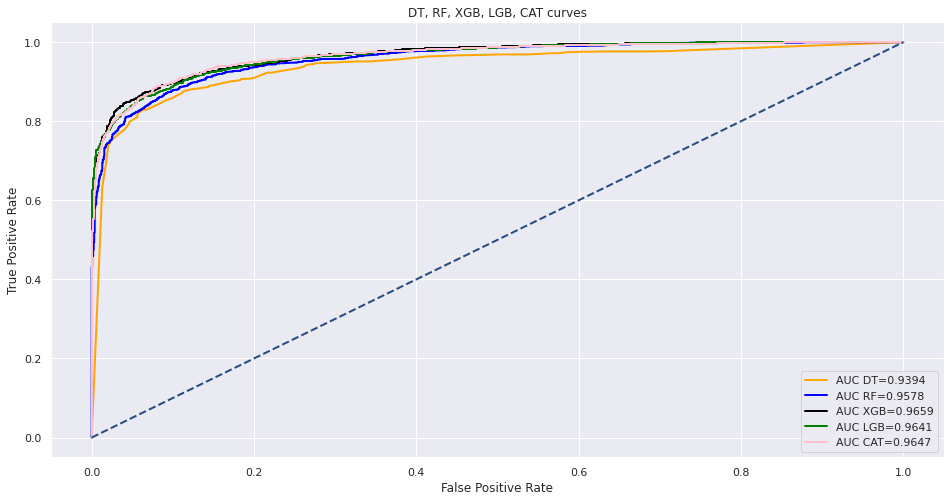

In [ ]:
from sklearn import metrics
#fpr = False Positive Rate 
#tpr = True Positive Rate 
#auc = area under cuve it tells how much the model is capable of distinguishing between classes.
#the largest auc is the best algorithm

plt.plot(fpr_list[0],tpr_list[0],'-',lw=2,color='orange',label='AUC DT=%.4f'%comparison_df['AUC'][0])
plt.plot(fpr_list[1],tpr_list[1],'-',lw=2,color='blue',label='AUC RF=%.4f'%comparison_df['AUC'][1])
plt.plot(fpr_list[2],tpr_list[2],'-',lw=2,color='black',label='AUC XGB=%.4f'%comparison_df['AUC'][2])
plt.plot(fpr_list[3],tpr_list[3],'-',lw=2,color='green',label='AUC LGB=%.4f'%comparison_df['AUC'][3])
plt.plot(fpr_list[4],tpr_list[4],'-',lw=2,color='pink',label='AUC CAT=%.4f'%comparison_df['AUC'][4])

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT, RF, XGB, LGB, CAT curves')
plt.legend(loc='lower right')

the erea under those curves will describe the AUC and the best model is XGBoost as the erea under its curve is the biggest(XGBoost is the in black) with AUC equals to 96.59% so in the next part we will fit that one as it is the best of all.

now in the final part we will fit and test and visualize the best model once more to give the last demo about our work, discoveries and andventures in creating a model that predicts if a customer is going to leave or stay

# **Fit best model**

in this section we will fit and test using the fit method and test using the accuracy score, feature importance and confusion matrix

Accuracy:  90.52102950408035 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6358
           1       1.00      1.00      1.00      6382

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1605
           1       0.93      0.88      0.90      1581

    accuracy                           0.91      3186
   macro avg       0.91      0.90      0.91      3186
weighted avg       0.91      0.91      0.91      3186



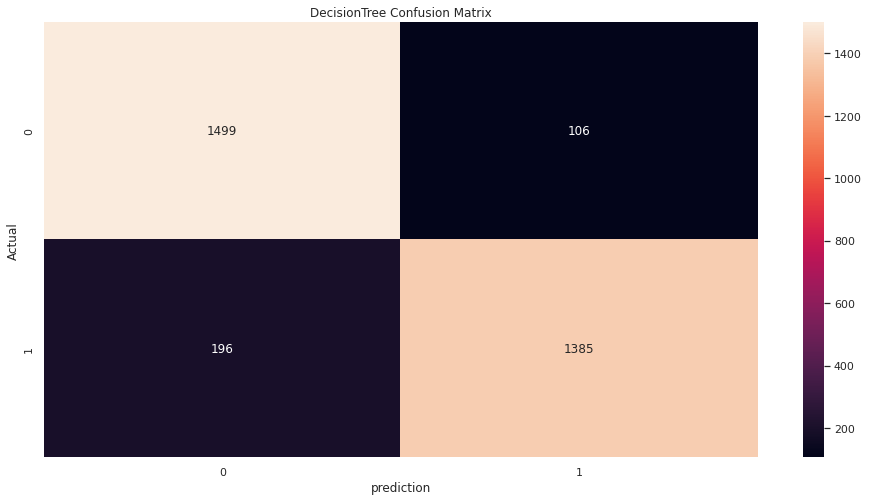

In [ ]:
#best model
model=XGBClassifier(gamma=0.001, learning_rate=0.3, max_depth=8, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Accuracy: ",accuracy*100,"%")
print(classification_report(y_train,  model.predict(x_train)))
print(classification_report(y_test,  model.predict(x_test)))

cf1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('DecisionTree Confusion Matrix')
plt.show()

looking to the numbers and heatmap we saw that the model preformes well and is not badly confused

<br>
<br>
<br>
<br>
in this section let's look at the roc curve(Receiver operating characteristic)

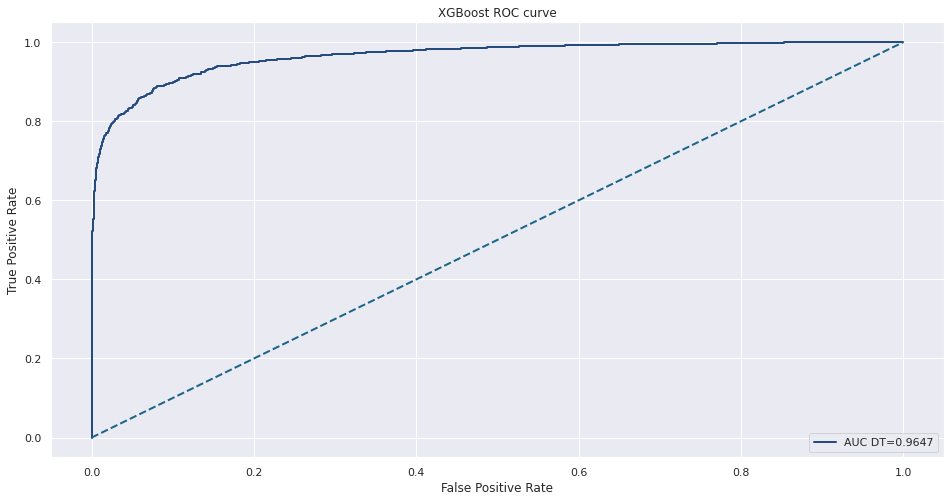

In [ ]:
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr,tpr)

plt.plot(fpr,tpr,'-',lw=2,label='AUC DT=%.4f'%auc)

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
plt.legend(loc='lower right')

as we illustrated before this curve tells use how good the model is preforming

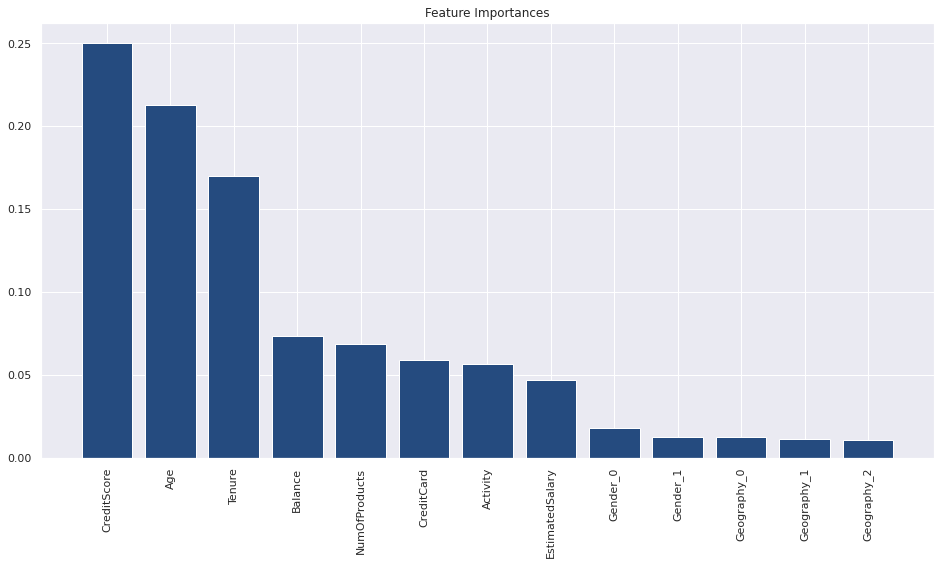

In [ ]:
# Visualization of the Feature importances
features_label = X_train.columns
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90)
plt.show()

looking at that we see that credit score heighly effects the results of the model it is heighly important to use it, then see age comes after it then tenure; those the model sees ase the most effective and important features then comes the rest with clearly lower importance and at the end comes Gender and Geography as the least important features

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br> <h5>At the end a special Thank to every one help us</h5>
how every every team member was doing one task, we also did a lot of cross functioning to ease and speed up the process
